KÜTÜPHANE ÇAĞIRMA VE YÜKLEME İŞLEMLERİ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

import warnings
warnings.filterwarnings("ignore")

VERİ SETİ YÜKLEME


In [ ]:
tf.keras.datasets.cifar10

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [ ]:
cifar10=tf.keras.datasets.cifar10 ## cifar10 veri seti yükleme ve verileri test-train olarak bölme işlemi.

(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
## verileri sırasıyla X_train/y_train/X_test/y_test olarak böldükten sonra boyutlarını yazdırma işlemi.
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
## 50000 tane eğitim, 10000 tane test görüntümüz var
# Veriler 32*32*3 boyutunda

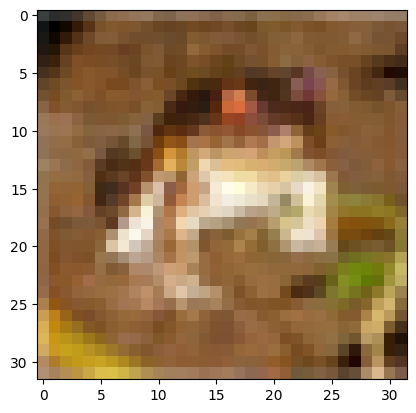

In [ ]:
## Verileri görselleştirelim

plt.figure()
plt.imshow(X_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

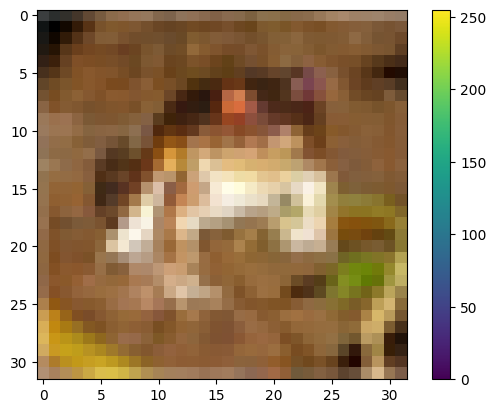

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()  ## renkli bar ekleme
plt.grid(False)
plt.show()

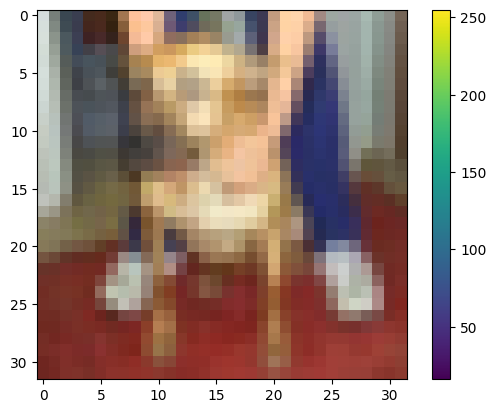

In [ ]:
plt.figure()
plt.imshow(X_train[51])
plt.colorbar()
plt.grid(False)
plt.show()

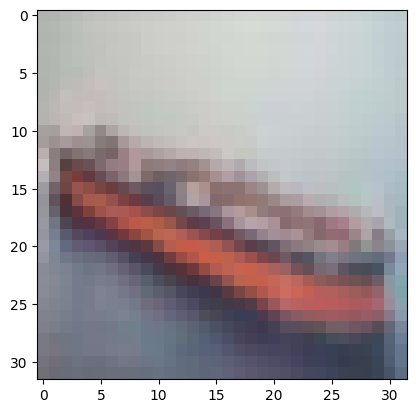

In [ ]:
plt.figure()
plt.imshow(X_test[999])
#plt.colorbar()
plt.grid(False)
plt.show()

VERİ NORMALLEŞTİRME

In [ ]:

## verileri 0-1 arasında sıkıştırarak normalleştirme yapıyoruz.
## maksimum değer 0-255 değerleri arasında olduğu için değerler ona göre ayarlandı.
X_train = X_train / 255.0

X_test = X_test / 255.0

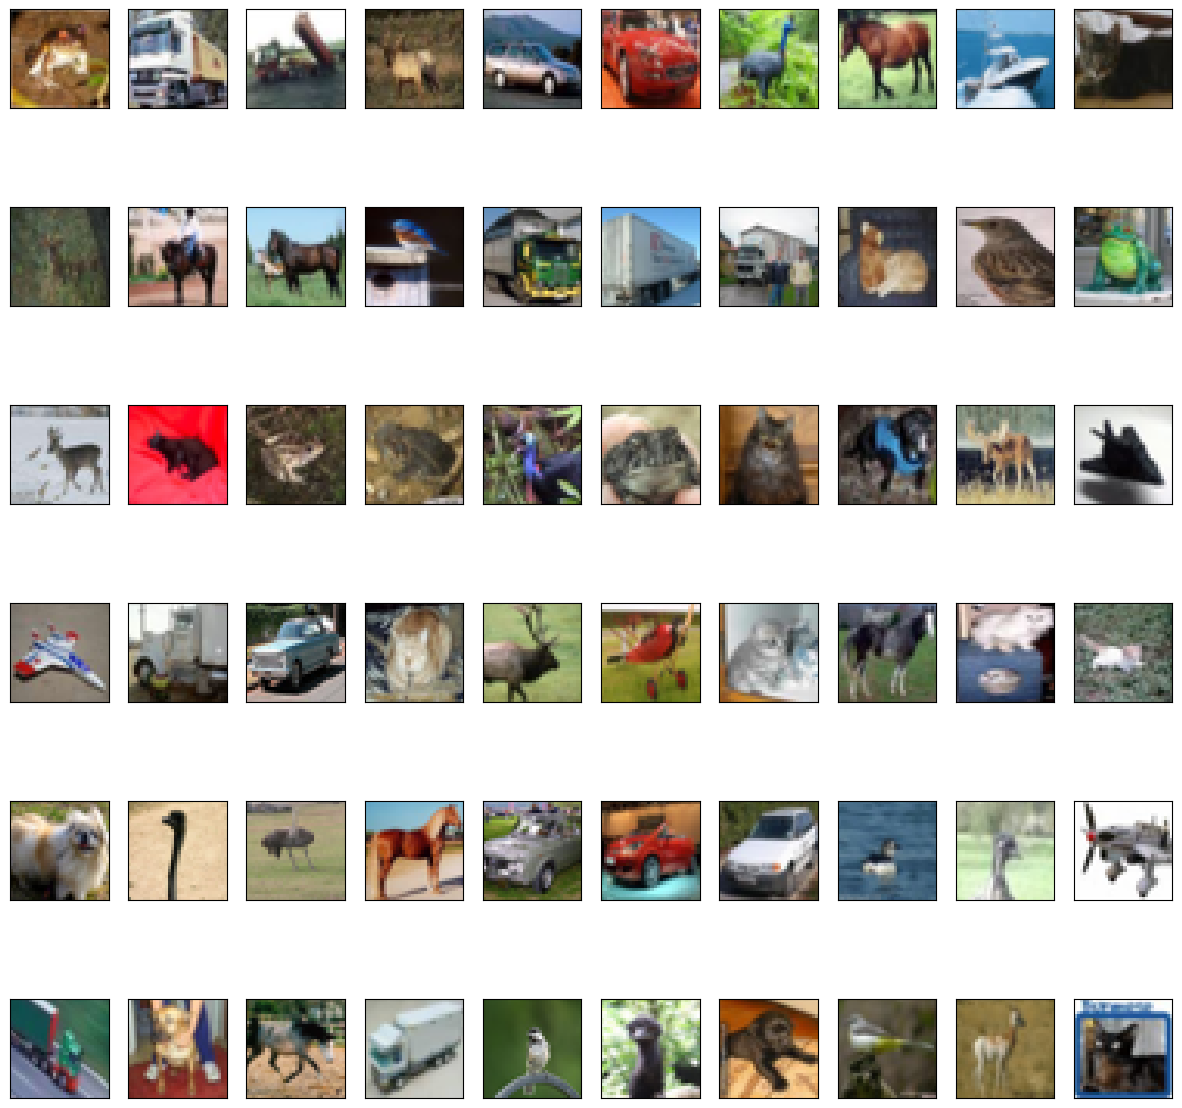

In [ ]:
## 60 görüntüyü görselleştirelim

plt.figure(figsize=(15,15))  ## resim boyutlarını belirleme

for i in range(60): ## veri seti içerisinden rastgele 60 resim seçme
    plt.subplot(6,10,i+1) ## resimleri sırasıyla kaç satır ve kaç sütün olacak şekilde belirleme
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

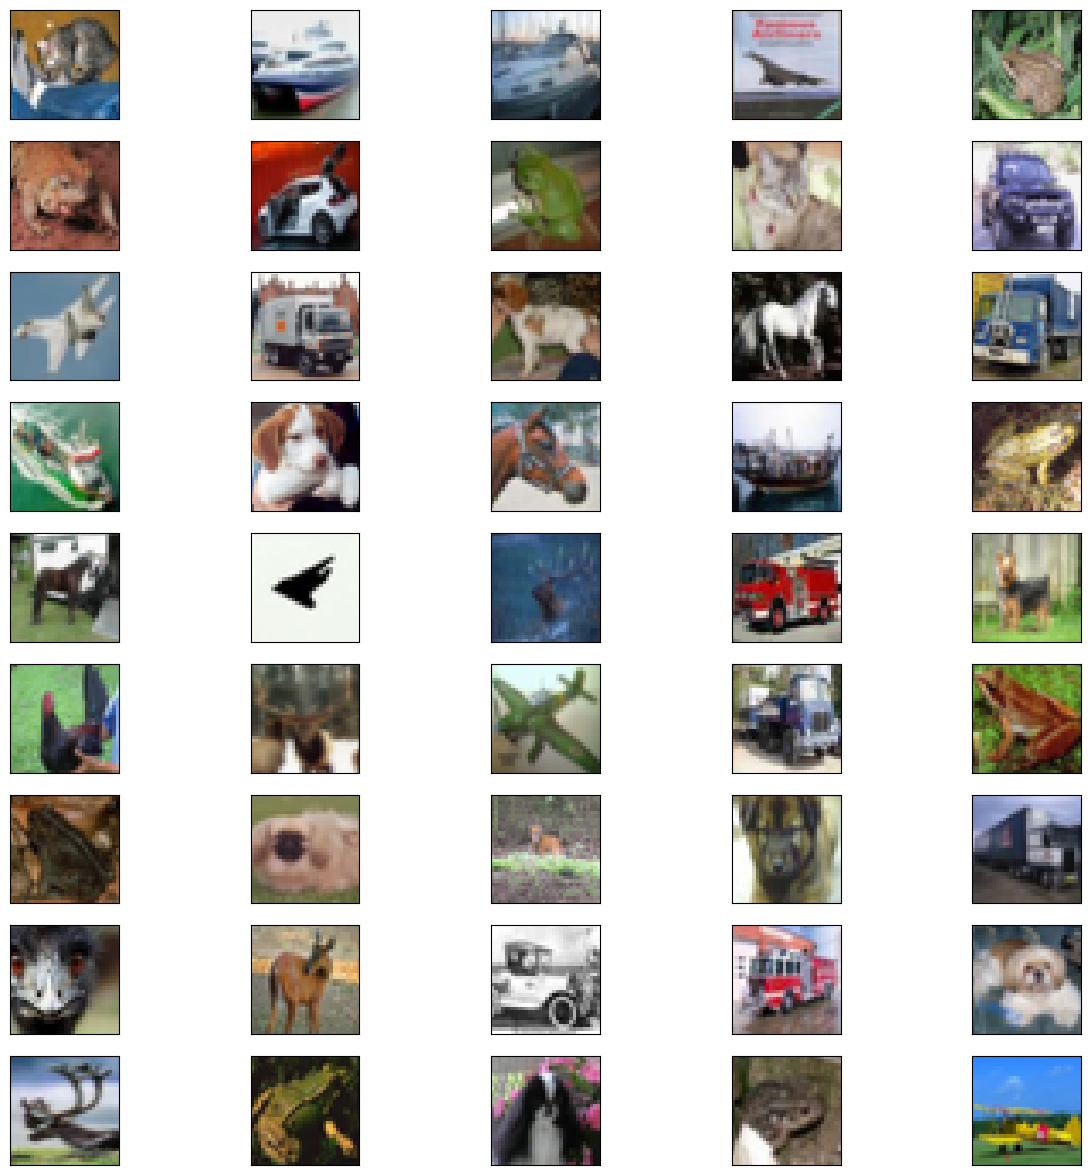

In [ ]:
## 45 görüntüyü görselleştirelim

plt.figure(figsize=(15,15))
for i in range(45):
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
plt.show()

MAKİNE ÖĞRENME MODELİ OLUŞTURMA

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
## verileri vektörlere dönüştürme
## vektörlere dönüştürme işlemi verilerin daha kolay işlenebilmesi ve analiz edilmesi için yararlıdır

X_train = X_train.reshape(X_train.shape[0], 3072)
X_test = X_test.reshape(X_test.shape[0], 3072)

In [ ]:
## pca kullanarak boyut azaltma işlemi yapıyoruz, svm modelinin daha hızlı sonuç vermesi için

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
## svc modeli
## pca ile boyutları azaltılmış eğitim verisi ile ravel komutu ile tek boyutlu hale getirilmiş verileri eğitme işlemi.
model = SVC(kernel='linear')
model.fit(X_train_pca, y_train.ravel())


SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test_pca)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy


0.4082

In [ ]:
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    airplane       0.47      0.50      0.48      1000
  automobile       0.46      0.49      0.48      1000
        bird       0.30      0.28      0.29      1000
         cat       0.31      0.32      0.31      1000
        deer       0.36      0.28      0.31      1000
         dog       0.35      0.32      0.33      1000
        frog       0.41      0.51      0.45      1000
       horse       0.46      0.41      0.44      1000
        ship       0.48      0.51      0.49      1000
       truck       0.45      0.47      0.46      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.41     10000
weighted avg       0.41      0.41      0.41     10000



In [ ]:
# Karmaşıklık matrisi
# matris sayesinde hangi sınıf ne kadar doğru veya yanlış tahmin edildi, onu anlamak için yapılır
cm = confusion_matrix(y_test, y_pred)
cm

array([[496,  43,  58,  35,  18,  28,  22,  46, 184,  70],
       [ 56, 488,  32,  42,  19,  40,  45,  41,  61, 176],
       [ 95,  51, 285,  97, 112,  75, 145,  75,  45,  20],
       [ 33,  64, 102, 317,  61, 160, 131,  40,  40,  52],
       [ 39,  32, 172,  72, 282,  80, 167, 105,  29,  22],
       [ 34,  45,  96, 182,  70, 324, 107,  77,  45,  20],
       [  9,  34,  94, 144,  97,  55, 505,  26,   9,  27],
       [ 52,  42,  66,  65, 108,  84,  57, 413,  31,  82],
       [173,  70,  20,  26,  13,  58,   9,  18, 505, 108],
       [ 63, 182,  20,  33,  14,  34,  41,  53,  93, 467]])

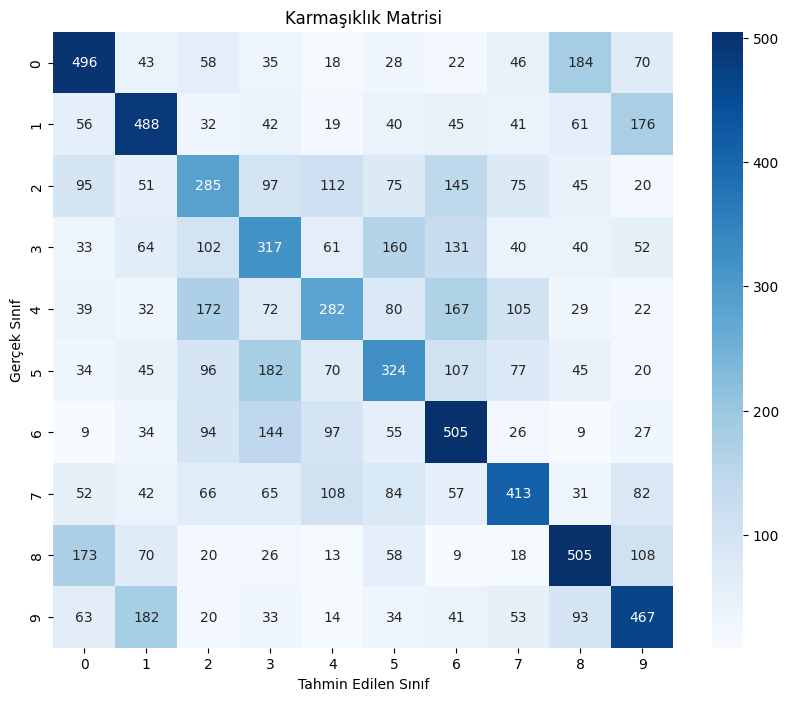

In [ ]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
## Random Forest oluştur

In [ ]:
rf=RandomForestClassifier().fit(X_train,y_train)  ## modelin eğitilmesi

In [ ]:
y_pred=rf.predict(X_test)  ## modelin test seti üzerindeki performansının değerlendirilmesi

In [ ]:
## performans metriklerinin hesaplanması
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
print(f'Doğruluk (Accuracy): {accuracy:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.4675
F1 Skoru: 0.4637
Geri Çağırma (Recall): 0.4675
Kesinlik (Precision): 0.4633


In [ ]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)
cm


array([[560,  33,  59,  18,  28,  23,  26,  26, 162,  65],
       [ 31, 543,  13,  34,  12,  42,  44,  31,  66, 184],
       [106,  43, 328,  78, 148,  62, 122,  54,  31,  28],
       [ 52,  41,  82, 276,  78, 179, 145,  53,  23,  71],
       [ 53,  24, 151,  57, 396,  48, 144,  81,  22,  24],
       [ 36,  29,  83, 157,  85, 382,  91,  81,  29,  27],
       [ 14,  32,  79,  80, 107,  63, 551,  21,  10,  43],
       [ 47,  50,  36,  69, 105,  73,  51, 458,  23,  88],
       [ 86,  93,  16,  23,  24,  36,  11,  23, 615,  73],
       [ 51, 160,  16,  28,  16,  21,  31,  35,  76, 566]])

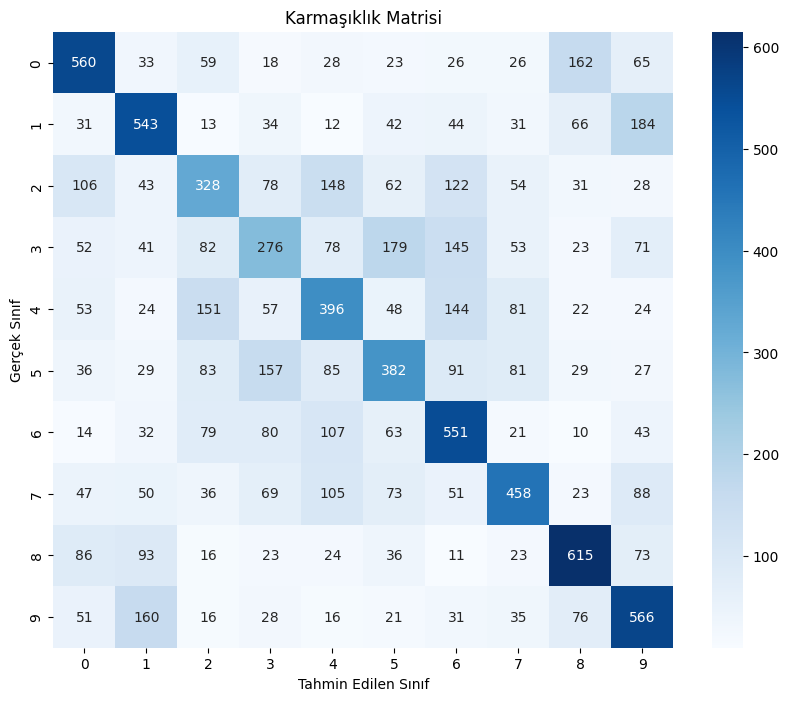

In [ ]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
## karar ağacı oluşturma

In [ ]:
dt=DecisionTreeClassifier().fit(X_train,y_train)

In [ ]:
y_pred=dt.predict(X_test)


accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
print(f'Doğruluk (Accuracy): {accuracy:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.2700
F1 Skoru: 0.2698
Geri Çağırma (Recall): 0.2700
Kesinlik (Precision): 0.2699


YSA İLE MODEL EĞİTİMİ

In [ ]:
cifar10=tf.keras.datasets.cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
## veri normalleştirme

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3, 1).astype('float32') / 255.0

In [ ]:
## classlar için one hot encoding işlemi yapalım
## işlem kategorik verileri sayısal forma dönüştürmek için kullanılır

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
## ysa model tanımlama ve özet
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),


    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 4)                 12292     
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 12422 (48.52 KB)
Trainable params: 12422 (48.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## derleme işlemi
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# eğitim
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy:

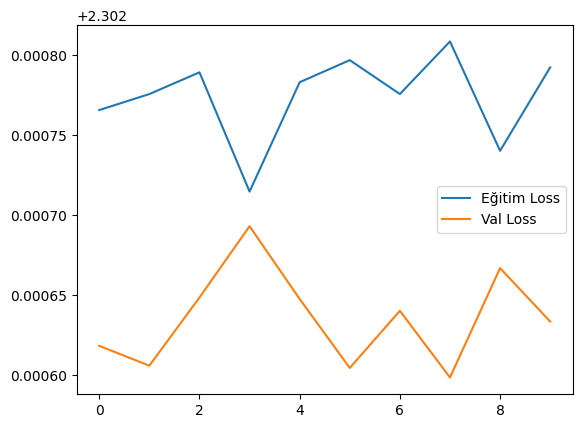

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()


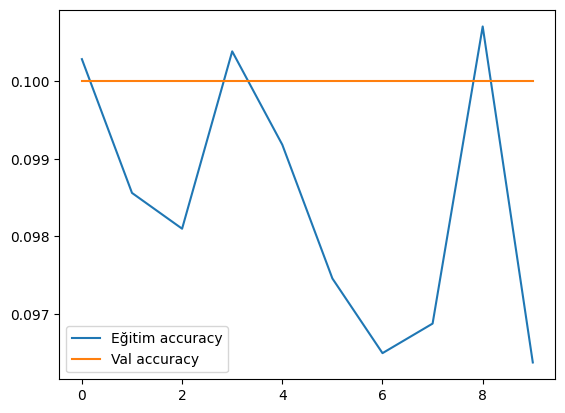

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.F1Score()])

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0982 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0854 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0182
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0989 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0737 - val_loss: 2.3027 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0182
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0982 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0708 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0182
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0977 - precision: 0.0000e+00 - recall: 0.0000e+00 -

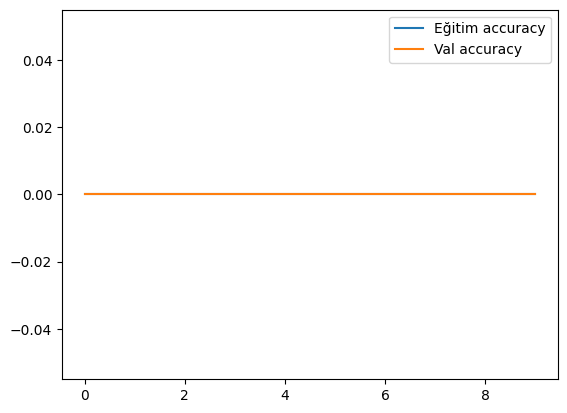

In [ ]:
plt.figure()
plt.plot(hist.history["precision"], label="Eğitim accuracy")
plt.plot(hist.history["val_precision"], label="Val accuracy")
plt.legend()
plt.show()

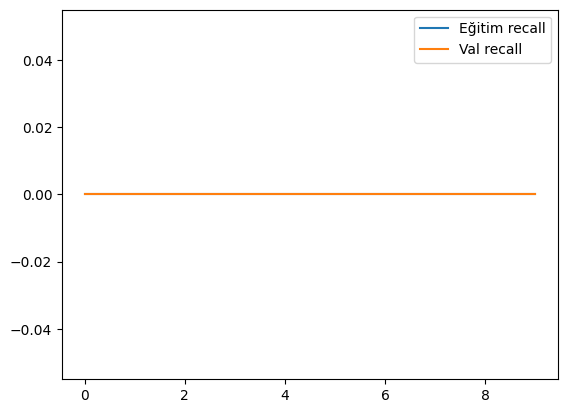

In [ ]:
plt.plot(hist.history["recall"], label="Eğitim recall")
plt.plot(hist.history["val_recall"], label="Val recall")
plt.legend()
plt.show()

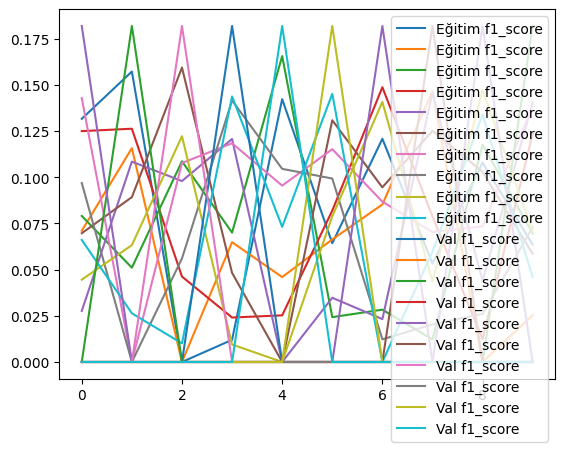

In [ ]:
plt.plot(hist.history["f1_score"], label="Eğitim f1_score")
plt.plot(hist.history["val_f1_score"], label="Val f1_score")
plt.legend()
plt.show()

DEĞERLERİ DEĞİŞTİRİREREK MODEL EĞİTİMİ


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),




    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                49168     
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 52474 (204.98 KB)
Trainable params: 5247

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 7ms/step - loss: 2.1050 - accuracy: 0.1757 - val_loss: 2.0463 - val_accuracy: 0.1991
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0547 - accuracy: 0.1918 - val_loss: 2.0493 - val_accuracy: 0.1825
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0451 - accuracy: 0.1929 - val_loss: 2.0568 - val_accuracy: 0.1910
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0419 - accuracy: 0.1948 - val_loss: 2.0406 - val_accuracy: 0.2013
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0392 - accuracy: 0.1948 - val_loss: 2.0298 - val_accuracy: 0.1918
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0356 - accuracy: 0.1971 - val_loss: 2.0403 - val_accuracy: 0.2025
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0337 - accuracy: 0.1979 - val_loss: 2.0347 - val_accura

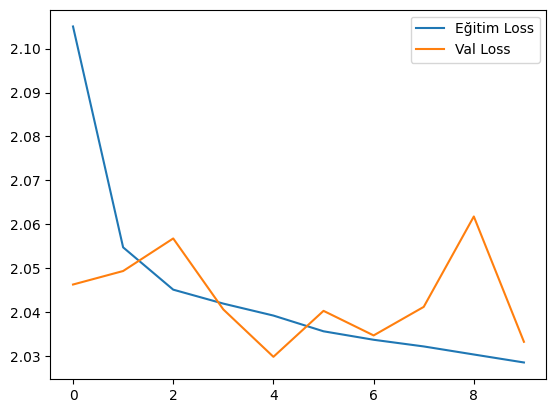

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()


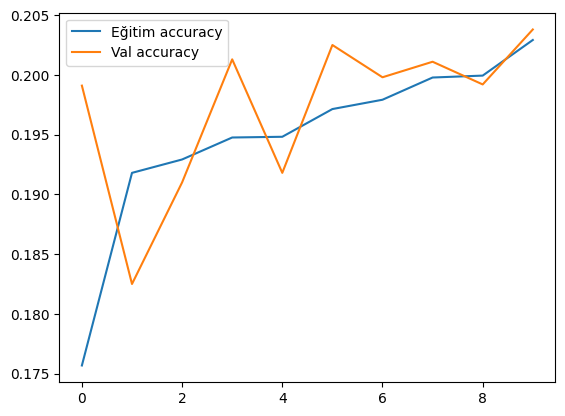

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.F1Score()])

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 11ms/step - loss: 2.0284 - accuracy: 0.2035 - precision_1: 0.5000 - recall_1: 6.4000e-04 - f1_score: 0.1522 - val_loss: 2.0309 - val_accuracy: 0.2030 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.1269
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0281 - accuracy: 0.2020 - precision_1: 0.4730 - recall_1: 7.0000e-04 - f1_score: 0.1521 - val_loss: 2.0523 - val_accuracy: 0.1977 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.1173
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0277 - accuracy: 0.2029 - precision_1: 0.3944 - recall_1: 5.6000e-04 - f1_score: 0.1534 - val_loss: 2.0359 - val_accuracy: 0.2048 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.1233
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0277 - accuracy: 0.2032 - precision_1: 0.5385 - recall_

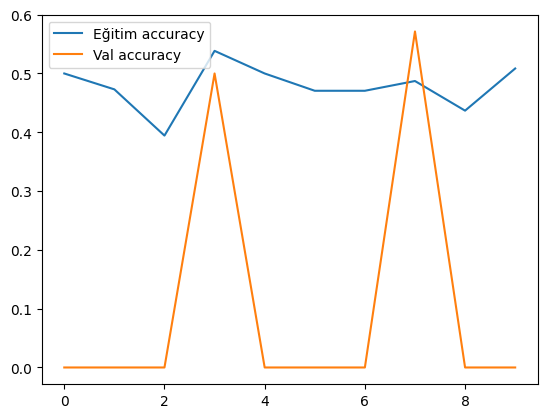

In [ ]:
plt.figure()
plt.plot(hist.history["precision_1"], label="Eğitim accuracy")
plt.plot(hist.history["val_precision_1"], label="Val accuracy")
plt.legend()
plt.show()

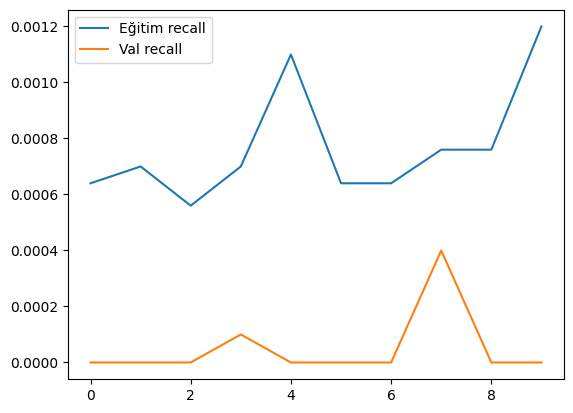

In [ ]:
plt.plot(hist.history["recall_1"], label="Eğitim recall")
plt.plot(hist.history["val_recall_1"], label="Val recall")
plt.legend()
plt.show()

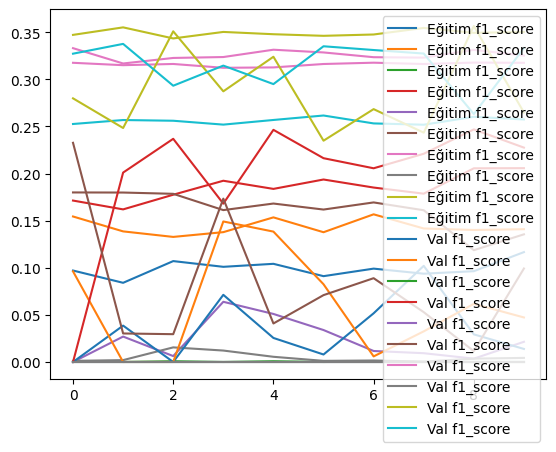

In [ ]:
plt.plot(hist.history["f1_score"], label="Eğitim f1_score")
plt.plot(hist.history["val_f1_score"], label="Val f1_score")
plt.legend()
plt.show()